___
<img style="float: left; margin: 30px 15px 15px 15px;" src="https://d33wubrfki0l68.cloudfront.net/4ec62c1c925a380c912ddad740d18554c6822a11/fabe4/img/sponsors/iteso-university.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Dario Castro Gonzalez y Juan Pablo Dominguez Rodriguez 

**Fecha:** 29 de abril del 2024.

**Expediente** : 719910 y 735196.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/JuanPablo0719/Proyecto_Modulo1

# Proyecto TEMA-2

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://th.bing.com/th/id/OIP.8Ttxi22mD3OyoWHKUnh4LgAAAA?rs=1&pid=ImgDetMain" width="300px" height="100px" />


# Proyecto Módulo 2- Guía.
> En este proyecto nos enfocaremos en poder modelar el clima de la ciudad de Seattle y ese mismo modelo poder adaptar a un videojuego donde  utilizaremos una base de datos llamada Kaggle es una plataforma web que reúne la comunidad Data Science más grande del mundo. Con la información obtenida, se pretende utilizar todas las herramientas vistas durante el curso para la correcta modelación y simulación del cierto problema con ciertas variables de interés.

## 1. Entregable.

### 1.1 Título del trabajo.
> - Modelado y Simulación del clima en la ciudad de Seattle para adaptarlo a un video juego

### 1.2 Objetivos.

> #### 1.1 Objetivo general.

>  - Desarrollar un modelo en Jupyter para predecir el clima de la ciudad de Seattle utilizando datos históricos sobre precipitación, temperaturas y viento disponibles en Kaggle para poder adaptarlo a un video juego.

> #### 1.2 Objetivos específicos

> - Utilizar la base de datos de Kaggle para acceder y procesar los datos históricos del clima.
> - Analizar y validar la precisión del modelo para asegurar que las predicciones sean confiables y útiles.
> - Selección y preparación de datos
> - Documentación y reporte de resultados



- https://es.slideshare.net/rosbur/metodologia-objetivos-generales-y-especficos

### 1.3 Definición del problema. 


> #### Escenario de negocio:

> - El proyecto se centra en el desarrollo de un modelo de simulacion del clima para la ciudad de Seattle utilizando datos históricos y poder adaptar el modelo a un video juego en el pueda generar diversos climas con parametros similares a los de Seattle. 


> #### Supuestos del Negocio:

>  - Datos Históricos: Se supone que los datos históricos del clima disponibles son precisos y suficientemente representativos para modelar el clima.

>  - Independencia de Eventos Extremos: Se considera que los eventos climáticos extremos son relativamente raros y no dominan la serie temporal, aunque su impacto será evaluado.

> #### Nodos o Escenarios a Simular:

> - Variación Diaria de Temperaturas

>  - Precipitación  

>  - Velocidad del Viento


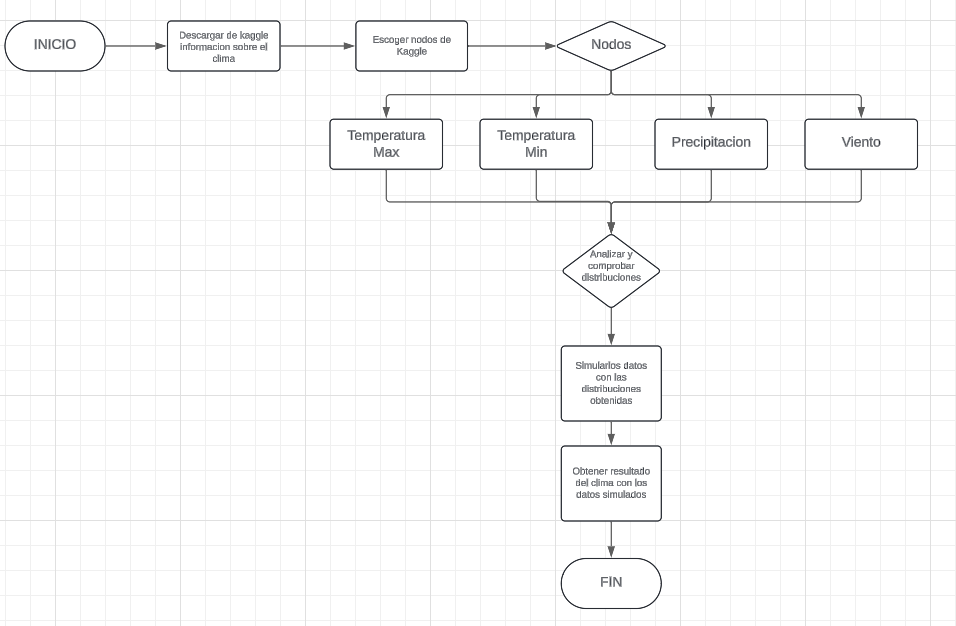


### 1.4 Nodos y variables que se decidieron simular y porqué


> Para abordar el problema de la simulacion del clima en la ciudad de Seattle, se han seleccionado varios nodos y variables para la simulación. Estos nodos y variables han sido escogidos en función de su relevancia sobre como se presentan. A continuación se detallan los nodos seleccionados y las razones detrás de su elección:

>  #### 1 y 2. Temperatura (Máxima y Mínima)
>  - Por qué: La temperatura es una varible que afecta a los individuos del juego ya que como las altas y las bajas  temperaturas afectara muchas codiciones fisicas del individuo.


>  - Viabilidad: Existen registros históricos detallados de temperaturas diarias, lo que permite modelar con precisión su comportamiento.



> #### 3. Precipitación

>  - Por qué: Seattle es conocida por su clima lluvioso. si a esto le sumamos las bajas temperaturas que presenta la ciudad generaria muchos problemas para el jugador ya que su personaje podria morir de hipotermia. 

>  - Viabilidad: Los datos de precipitación son ampliamente registrados y disponibles, permitiendo simular no solo la cantidad típica de lluvia.

> #### 4. Velocidad del Viento


>  - Por qué: En el videojuego la velocidad del viento impactara en muchas situaciones pero en concreto la sensacion termica del personaje, ya sea que el personaje sienta mas frio o este fresco debido a las latas temperaturas. 

>  - Viabilidad: Los datos sobre velocidad del viento son regularmente recopilados por estaciones meteorológicas, facilitando la modelación de patrones de viento y la evaluación de su impacto en diferentes escenarios. 
 


> #### Argumentación de la Selección de Nodos

>  - La selección de estos nodos está basada en la necesidad de entender condiciones climáticas que afectan directamente  Seattle. Al centrarnos en estas variables específicas, el modelo puede proporcionar información valiosa y accionable para nuestra simulacion.


### 1.5 Definición de hipótesis y supuestos. 

>  Comprobar si nuestros datos siguen alguna distribucion deseada para poder generar variables aleatorias que sigan este mismo comportamiento. 

### 1.6 Obtención de bases de datos
> #### Kaggle
>  - Descripción: Kaggle es una plataforma de competencias de ciencia de datos que también ofrece una vasta biblioteca de conjuntos de datos públicos subidos por usuarios y organizaciones.
>  - Datos Específicos: Conjuntos de datos de condiciones climáticas históricas para Seattle, que pueden incluir temperatura, precipitación, velocidad del viento y otros parámetros meteorológicos.
>  - Procedimiento: Buscar en Kaggle datasets relacionados con el clima de Seattle o condiciones climáticas generales. Descargar los datos después de revisar su pertinencia y calidad.

### 1.7 Visualización de resultados de simulación.


In [123]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from scipy.stats import norm
from scipy import optimize
import scipy.stats as st     # Librería estadística
import warnings
warnings.filterwarnings("ignore")
import math
import random
import scipy.special as sps
from scipy.optimize import minimize
from scipy.stats import kstest
import scipy.optimize as opt
from scipy.integrate import simps
from sklearn.model_selection import train_test_split
from scipy.stats import beta

### Obtencion de datos atraves de Kaggle.
Link de descarga:
https://www.kaggle.com/datasets/ananthr1/weather-prediction?resource=download

In [73]:
# Leer los datos del archivo CSV
datos = pd.read_csv('seattle-weather.csv')
print(datos)

            date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]


In [74]:
#Dividir los datos en train y test para evaluar mas tarde.
data_train, data_test = train_test_split(datos, test_size=0.1, random_state=42)
print("Número de filas en train:", len(data_train))
print("Número de filas en test:", len(data_test))

Número de filas en train: 1314
Número de filas en test: 147


In [75]:
print(data_train)

            date  precipitation  temp_max  temp_min  wind weather
782   2014-02-21            2.8       6.7       3.9   2.9    rain
952   2014-08-10            0.0      30.6      13.9   3.4     sun
620   2013-09-12            0.0      25.6      15.0   1.7     sun
669   2013-10-31            0.3      14.4      10.6   2.2    rain
128   2012-05-08            0.0      18.3       9.4   3.0     sun
...          ...            ...       ...       ...   ...     ...
1130  2015-02-04            8.4      10.6       4.4   1.7    rain
1294  2015-07-18            0.0      33.3      17.8   3.4     sun
860   2014-05-10            0.5      15.6       7.2   2.1    rain
1459  2015-12-30            0.0       5.6      -1.0   3.4     sun
1126  2015-01-31            0.0       7.2       3.3   1.9     fog

[1314 rows x 6 columns]


#### 1) Obteniendo el KDE

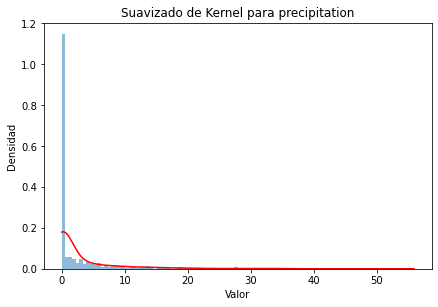

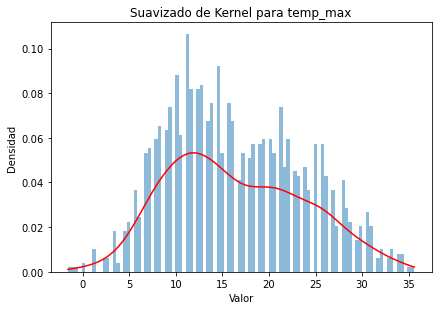

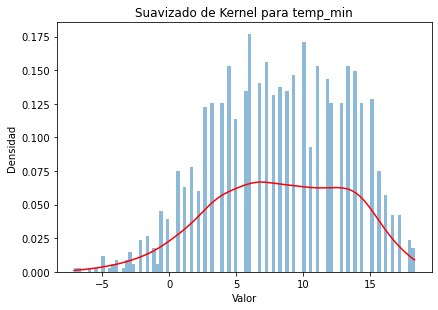

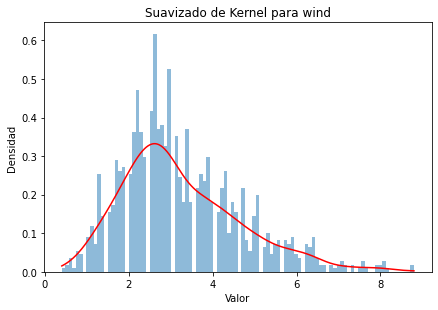

In [77]:
# Seleccionar solo las columnas 2 a 5
selected_columns = data_train.iloc[:, 1:5]
#Aplicar suavizado de kernel a cada columna del data set menos la ultima
for column in selected_columns.columns:
    # Histograma
    plt.hist(selected_columns[column], bins=100, density=True, alpha=0.5)
    
    # Suavizado de kernel
    kde = gaussian_kde(selected_columns[column])
    x_vals = np.linspace(min(selected_columns[column]), max(selected_columns[column]), 1000)
    plt.tight_layout()
    plt.plot(x_vals, kde(x_vals), 'r')
    
    # Etiquetas y título
    plt.xlabel('Valor')
    plt.ylabel('Densidad')
    plt.title(f'Suavizado de Kernel para {column}')
    
    # Mostrar el gráfico
    plt.show()

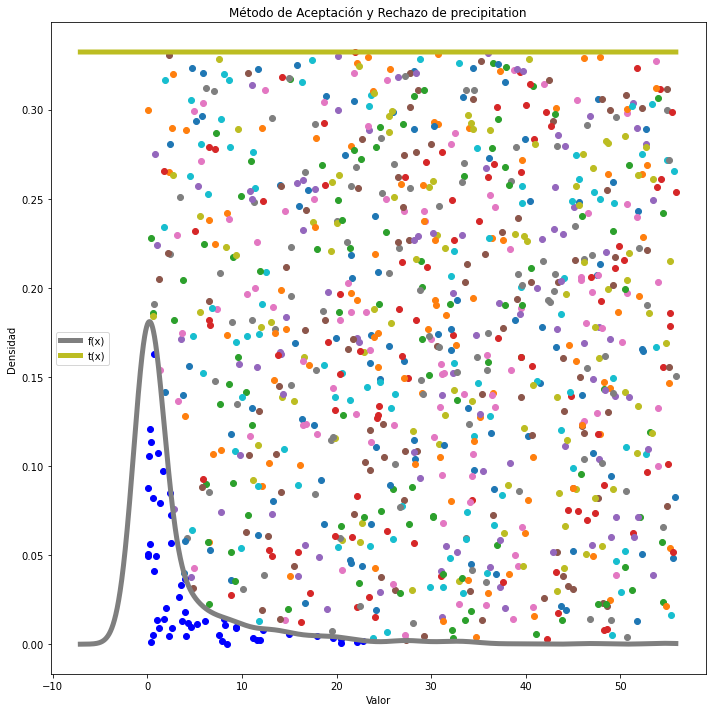

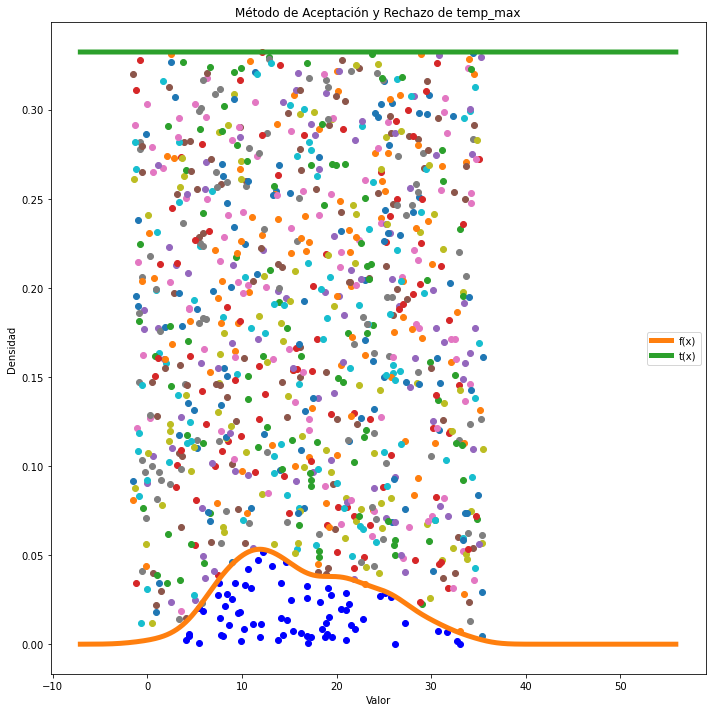

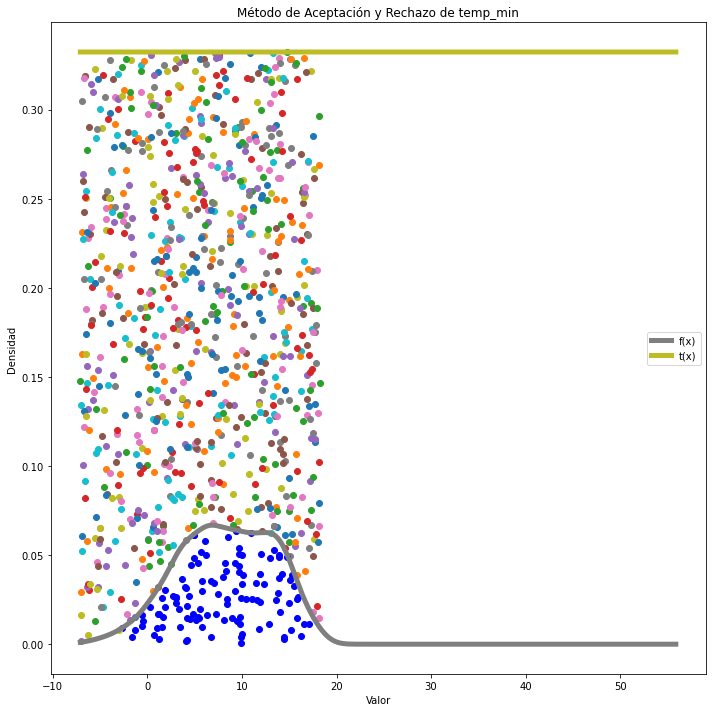

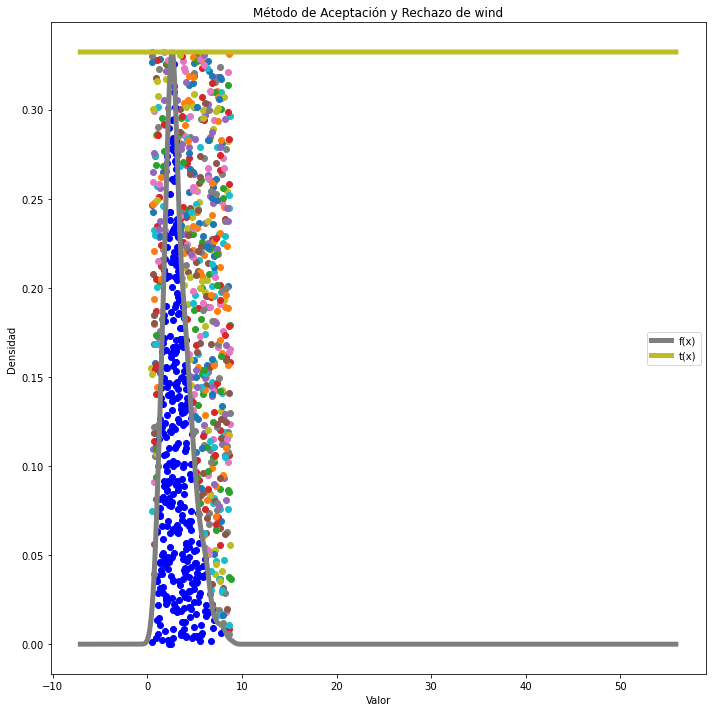

In [78]:
# Función de aceptación y rechazo modificada para aceptar arrays
def Acep_rechazo_array(R2, R1, f, t):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2 * t_x <= f_x
    plt.figure(figsize=(10, 10))
    [plt.plot(R1[i], R2[i] * t_x[i], 'ob') if condition[i] else plt.plot(R1[i], R2[i] * t_x[i], 'o') \
     for i in range(len(R1))]
    plt.plot(x, f(x), label='f(x)', linewidth=5)
    plt.plot(x, t(x), label='t(x)', linewidth=5)
    plt.legend()
    plt.xlabel('Valor')
    plt.ylabel('Densidad')
    plt.title(f'Método de Aceptación y Rechazo de {column}')
    plt.tight_layout()
    plt.show()

# Definir la función de densidad de probabilidad (PDF) y la función constante t(x)
def f(x):
    return kde(x)

def t(x):
    return max_f * np.ones(len(x))
# Rango donde se graficarán las funciones
x = np.arange(np.min(selected_columns.values), np.max(selected_columns.values), 0.01)
# Obtener el máximo de la función f para todas las columnas
max_f = np.max([gaussian_kde(data_train[column]).evaluate(x) for column in selected_columns.columns])


# Validación del método para cada columna seleccionada
for column in selected_columns.columns:
    # Obtener los datos de la columna
    datos_columna = selected_columns[column]
    
    # Función de densidad de probabilidad (PDF) para la columna
    kde = gaussian_kde(datos_columna)
    
    # Ejecutar el método de aceptación y rechazo
    N = 1000 
    R2 = np.random.uniform(0, 1, N)
    R1 = np.random.uniform(np.min(datos_columna), np.max(datos_columna), N)
    Acep_rechazo_array(R2, R1, f, t)


In [79]:
from scipy import optimize

def kde_statsmodels_m(x, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    from statsmodels.nonparametric.kernel_density import KDEMultivariate
    kde = KDEMultivariate(x, var_type='c', **kwargs)
    return lambda x_grid: kde.pdf(x_grid)

# Función para calcular el máximo de la función f
def calcular_maximo_f(datos_columna):
    fun = kde_statsmodels_m(datos_columna)
    f = lambda x: fun(x)
    max_f = f(optimize.fmin(lambda x:-f(x), 1, disp=False))
    return max_f

# Rango donde se graficarán las funciones
x = np.arange(np.min(selected_columns.values), np.max(selected_columns.values), 0.01)

# Calcular el máximo de f para cada columna seleccionada y mostrar el nombre de la columna y su valor máximo
for column in selected_columns.columns:
    # Obtener los datos de la columna
    datos_columna = selected_columns[column]
    
    # Calcular el máximo de f para la columna
    max_f = calcular_maximo_f(datos_columna)
    
    # Imprimir el nombre de la columna y su valor máximo
    print(f"El máximo de f para la columna '{column}' es: {max_f}")


El máximo de f para la columna 'precipitation' es: 0.1721329056502494
El máximo de f para la columna 'temp_max' es: 0.05291526922050663
El máximo de f para la columna 'temp_min' es: 0.06655808407071417
El máximo de f para la columna 'wind' es: 0.328985598992498


(0.3767742911033022,
 309.5114095625505,
 -5.149296132433557e-26,
 1053.027585608776)

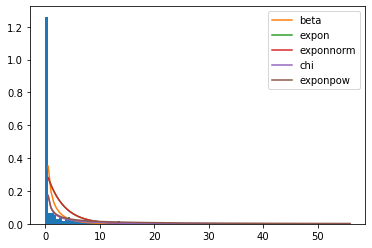

In [80]:
def best_dist( nodo:"Variable a la cual se desea ajustar una distribucion estadistica continua existente"):
    """
    
    Esta función recibe sólo una variable, a la cual ajusta las primeras 20 distribuciones continuas que 
    contiene el paquete scipy. Se comparan las distribuciones contra nuestros datos y se crea un dataFrame para 
    registrar el error cuadrático promedio, se ordena el dataframe de menor a mayor, se almacenan los primeros 5 valores y se 
    crea una lista de estas distribuciones. Posteriormente, itera sobre la lista de distribuciones mejor ajustadas y se grafican
    las funciones de densidad de probabilidad sobre el histograma para mostrar la comparación visual. Por último, se almacenan los 
    parámetros de estas funciones en una lista.
    Esta función regresa la distribución con menor error y sus parámetros, en dos variables.
    """
    y,x,_ = plt.hist(nodo, bins = "auto", density = True)
    x = x[1:]
    
    dist = [d for d in dir(st) if isinstance(getattr(st, d), getattr(st, "rv_continuous"))]
    dist = dist[0:20]
    error = pd.DataFrame(index = dist, columns = ["distribucion", "error"])
    i = 0
    
    for d in dist:
        param = getattr(st, d).fit(nodo)
        y_hat = getattr(st, d).pdf(x, *param)
        error.loc[d] = ((y - y_hat)**2).mean()
    menor_error = error.sort_values(by = "error")
    menor_error = menor_error[0:5]
    dists_menor_error = menor_error.index
    distribucion_menor_error = []
    parametros = []
    for d in dists_menor_error:
        distribucion_menor_error.append(getattr(st,d))
        param = getattr(st,d).fit(nodo)
        y_hat = getattr(st,d)(*param).pdf(x)
        parametros.append(param)
        plt.plot(x,y_hat,label = d)
    plt.legend()
    return distribucion_menor_error[0], parametros[0]
d,p = best_dist(data_train['precipitation'])
p

(3.471266083362554, 4.670124507186647, -2.4574099678538914, 44.39305392120703)

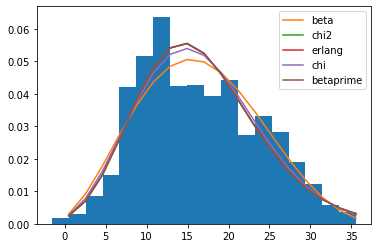

In [81]:
d,p = best_dist(data_train['temp_max'])
p



## T.Reducción Varianza 

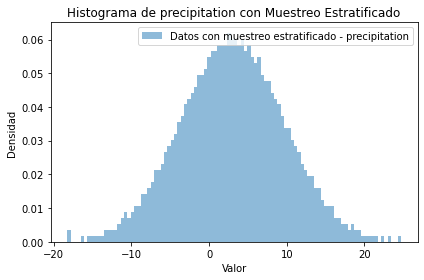

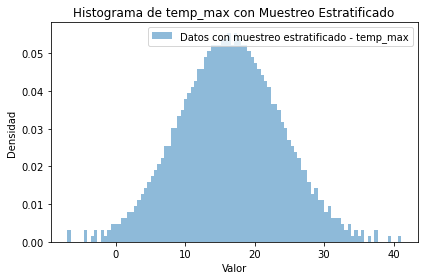

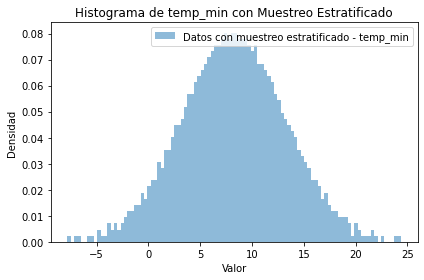

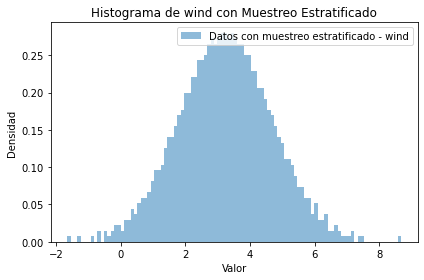

In [82]:
#Vamos a aplicar metodos de reduccion de varianza. 
# Definición de la función de muestreo estratificado
def m_estratificado(a, b, B):
    Ui = np.random.uniform(a, b, B)
    Bi = np.arange(0, B)
    Ui_estra = (Ui + Bi) / B
    return Ui_estra

# Parámetros
B = len(data_train)

# Función para realizar muestreo estratificado y generar histograma
def generar_histograma_muestreo(columna):
    # Realizar muestreo estratificado
    Ui_estratificado = m_estratificado(0, 1, len(columna))
    datos_estratificados = st.norm(loc=np.mean(columna), scale=np.std(columna)).ppf(Ui_estratificado)
    
    # Generar histograma
    plt.hist(datos_estratificados, bins=100, density=True, alpha=0.5, label=f'Datos con muestreo estratificado - {columna.name}')
    plt.xlabel('Valor')
    plt.ylabel('Densidad')
    plt.title(f'Histograma de {columna.name} con Muestreo Estratificado')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Aplicar muestreo estratificado y generar histograma para cada columna seleccionada
for columna in selected_columns.columns:
    generar_histograma_muestreo(selected_columns[columna])


Distribución seleccionada: <scipy.stats._continuous_distns.beta_gen object at 0x000001CCE1A5B4F0>
Parámetros de la distribución: (154003.46364304321, 4819.616721811349, -15043.760265150198, 15517.662286774726)


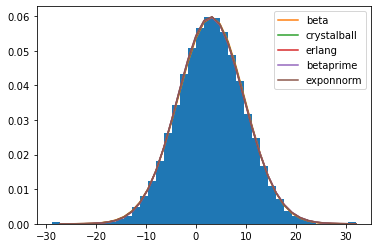

In [83]:
# Realizar muestreo estratificado
Ui_estratificado = m_estratificado(0, 1, B)
datos_estratificados_precipitacion = st.norm(loc=np.mean(data_train['precipitation']), scale=np.std(data_train['precipitation'])).ppf(Ui_estratificado)

# Calcular d y p utilizando la función best_dist con los datos estratificados
d, p = best_dist(datos_estratificados_precipitacion)
print("Distribución seleccionada:", d)
print("Parámetros de la distribución:", p)

Distribución seleccionada: <scipy.stats._continuous_distns.burr_gen object at 0x000001CCE1A4F460>
Parámetros de la distribución: (6.098456818177118, 0.15510682668759368, 0.10325725899155945, 12.61070254225799)


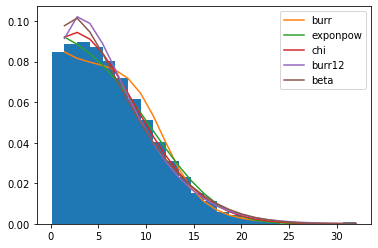

In [84]:
# Filtrar valores menores que cero ya que no puede haber menor a 0
datos_estratificados_precipitacion_filtrados = datos_estratificados_precipitacion[datos_estratificados_precipitacion >= 0.1]

# Calcular d y p utilizando la función best_dist con los datos estratificados filtrados
d, p = best_dist(datos_estratificados_precipitacion_filtrados)
print("Distribución seleccionada:", d)
print("Parámetros de la distribución:", p)


## Ahora si podemos ver con facilidad que burr es la que mejor se ajusta a los datos. 

## Q-Q y ajuste de PDF teóricas

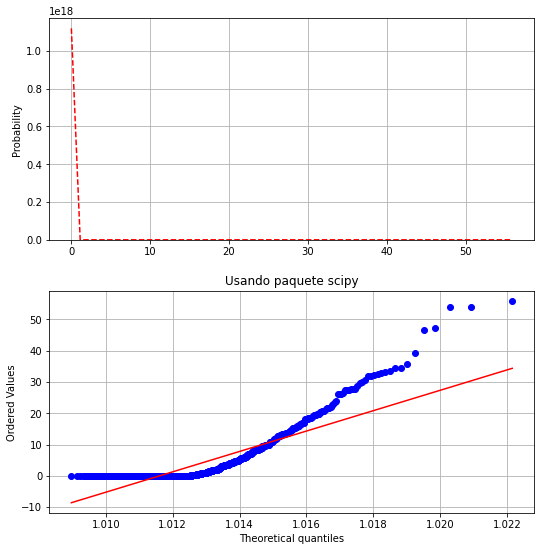

In [85]:
def Q_Q(nodo: "Variable a la que intentamos ajustar una distribución", 
        distribucion: "Nombre de la distribución continua que se compara con los datos", 
        parametros: "Parámetros de la distribución"):
    """
    
    Esta función recibe 3 variables, un nodo datos distribuidos, una distribución continua que comparamos a los datos 
    y, los parametros de dicha distribución.
    Se grafican las frecuencias de nuestros datos junto a una línea que sigue a la distribución propuesta con los parámetros 
    dados, y se comparan las frecuencias obtenidas de nuestros datos en cada cuantil con las frecuencias que debimos haber 
    obtenido teóricamente con la distribución y parámetros asignados y se muestra una recta donde podemos observar visualmente 
    si los datos siguen la distribución o no.
    """
    
    measurements = nodo   
    divisiones = 50 # Cantidad de barras en el histograma
    fig, ax = plt.subplots(2, 1, figsize=(8,8))
    fig.tight_layout(pad = 3.0)

    y, x, _ = ax[0].hist(measurements, divisiones, density = True, label = 'Histograma mediciones')

    # Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
    dist = distribucion
    params = getattr(st, dist).fit(measurements)

    # Graficar PDF de la distribución que queremos probar

    # x = np.arange(measurements.min(), measurements.max(), .01)
    y_hat = getattr(st, dist).pdf(x, *params)
    ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
    ax[0].set_ylabel('Probability')
    ax[0].grid()

    # gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
    # Usando scipy
    grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
    ax[1].grid()
    ax[1].set_title('Usando paquete scipy')

    # plt.xlabel(f'{dist.title()} theorical quantiles')
    # plt.ylabel('Data theorical quantiles')
    plt.show()

mejordist = "burr"
Q_Q(data_train['precipitation'], mejordist, p)

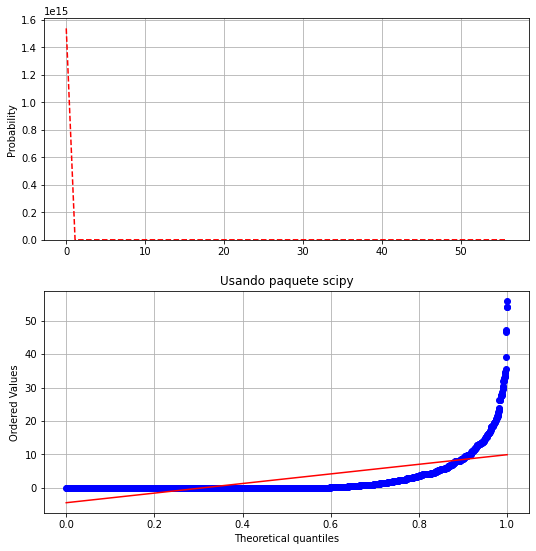

In [119]:
mejordist = "beta"
Q_Q(data_train['precipitation'], mejordist, p)

Con la prueba de Q-Q vemos que los datos se ajustan mejor a beta.

In [118]:
parametros = st.beta.fit(data_train['precipitation'])
# Realizar prueba de Kolmogorov-Smirnov
D, p_value = kstest(data_train['precipitation'], 'beta', args=parametros)

# Imprimir resultados
print("Prueba de Chi^2 con una distribucion","beta","y parametros",parametros)
print("Estadístico D: ", D)
print("p-value: ", p_value)

Prueba de Chi^2 con una distribucion beta y parametros (0.3767742911033022, 309.5114095625505, -5.149296132433557e-26, 1053.027585608776)
Estadístico D:  0.5738203955279596
p-value:  0.0


Con la prueba podemos ver que no tiene una distribucion beta

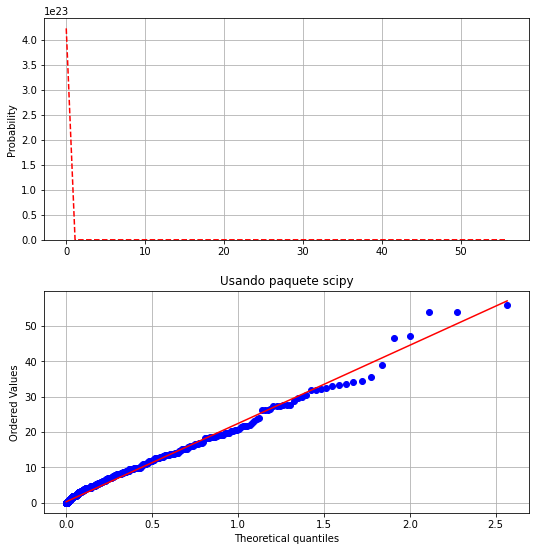

In [121]:
mejordist = "chi"
Q_Q(data_train['precipitation'], mejordist, p)

In [124]:
# Obtener los parámetros de la distribución beta ajustados a los datos
parametros = beta.fit(data_train['precipitation'])

# Definir la CDF de la distribución beta con los parámetros ajustados
cdf_beta = beta.cdf(data_train['precipitation'], *parametros)

# Realizar la prueba de Kolmogorov-Smirnov
D, p_value = kstest(data_train['precipitation'], cdf_beta)

# Imprimir resultados
print("Prueba de Kolmogorov-Smirnov con una distribución beta y parámetros:", parametros)
print("Estadístico D:", D)
print("p-value:", p_value)


Prueba de Kolmogorov-Smirnov con una distribución beta y parámetros: (0.3767742911033022, 309.5114095625505, -5.149296132433557e-26, 1053.027585608776)
Estadístico D: 0.573820395738204
p-value: 3.2549816012543707e-200


## P.Hipotesis

> $H_0$: la distribución no es `beta`

> $H_a$: los datos se distribuyen como `beta`

## Montecarlo

In [88]:
random.seed(42)
print("Prueba de Chi^2 con una distribucion","beta","y parametros",parametros)
print("Estadístico D: ", D)
print("p-value: ", p_value)
# Definir la función de simulación de Monte Carlo
def monte_carlo_beta(parametros, n_simulaciones):
    # Generar números aleatorios utilizando la distribución beta
    muestras_simuladas = st.beta.rvs(*parametros, size=n_simulaciones)
    # Calcular el valor de interés para cada simulación
    valores_interes = muestras_simuladas
    # Calcular el valor esperado
    valor_esperado = np.mean(valores_interes)
    return valor_esperado

# Número de simulaciones
n_simulaciones = 10000

# Realizar la simulación de Monte Carlo
valor_esperado = monte_carlo_beta(parametros, n_simulaciones)

# Imprimir el valor esperado obtenido de la simulación de Monte Carlo
print("Valor esperado de la simulación de Monte Carlo:", valor_esperado) 



Prueba de Chi^2 con una distribucion beta y parametros (0.3767742911033022, 309.5114095625505, -5.149296132433557e-26, 1053.027585608776)
Estadístico D:  0.5738203955279596
p-value:  0.0
Valor esperado de la simulación de Monte Carlo: 1.3085031648679422


In [89]:
mediadatos = np.mean(data_train['precipitation'])
mediadatos

3.007838660578394

In [90]:
# Calcular el error
error = abs(valor_esperado - mediadatos) / mediadatos * 100
print("Error%:", error)

Error%: 56.49689652515063


## Conclusion:
este nodo no tiene una distribucion que podamos simular y la media es muy distinta. 

## Nodo 2 Temperatura Maxima(temp_max)

Distribución seleccionada: <scipy.stats._continuous_distns.beta_gen object at 0x000001CCE1A5B4F0>
Parámetros de la distribución: (3.471266083362554, 4.670124507186647, -2.4574099678538914, 44.39305392120703)


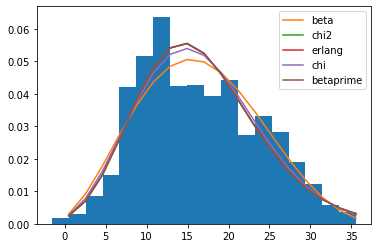

In [91]:
# Calcular d y p utilizando la función best_dist con los datos
d, p = best_dist(data_train['temp_max'])
print("Distribución seleccionada:", d)
print("Parámetros de la distribución:", p)

Distribución seleccionada: <scipy.stats._continuous_distns.beta_gen object at 0x000001CCE1A5B4F0>
Parámetros de la distribución: (175.85963062196382, 171.3446621874271, -122.08747743316721, 273.4931130963023)


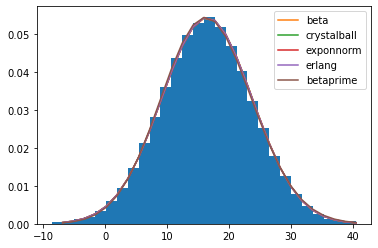

In [92]:
# Realizar muestreo estratificado
Ui_estratificado = m_estratificado(0, 1, B)
datos_estratificados_tempmax = st.norm(loc=np.mean(data_train['temp_max']), scale=np.std(data_train['temp_max'])).ppf(Ui_estratificado)

# Calcular d y p utilizando la función best_dist con los datos estratificados
d, p = best_dist(datos_estratificados_tempmax)
print("Distribución seleccionada:", d)
print("Parámetros de la distribución:", p)

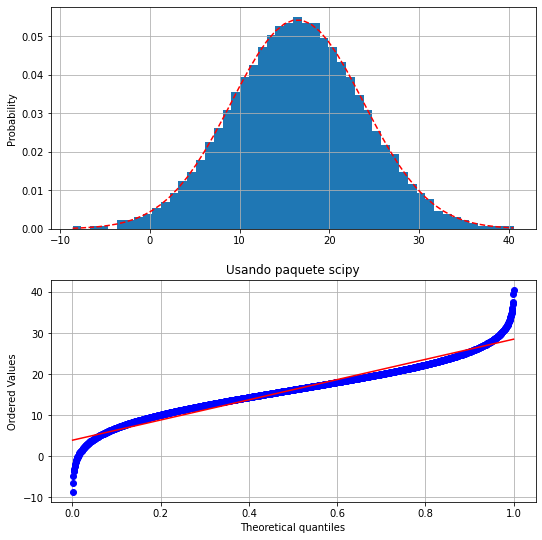

In [93]:
mejordist = "beta"
Q_Q(datos_estratificados_tempmax, mejordist, p)

In [94]:
parametros = st.beta.fit(datos_estratificados_tempmax)
# Realizar prueba de Kolmogorov-Smirnov
D, p_value = kstest(datos_estratificados_tempmax, 'beta', args=parametros)

# Imprimir resultados
print("Prueba de Chi^2 con una distribucion","beta","y parametros",parametros)
print("Estadístico D: ", D)
print("p-value: ", p_value)

Prueba de Chi^2 con una distribucion beta y parametros (175.85963062196382, 171.3446621874271, -122.08747743316721, 273.4931130963023)
Estadístico D:  0.0011425981159981502
p-value:  1.0


## P. Hipotesis
> $H_0$: la distribución no es `beta`

> $H_a$: los datos se distribuyen como `beta`

In [95]:
random.seed(42)
# Número de simulaciones
n_simulaciones = 10000

# Realizar la simulación de Monte Carlo
valor_esperado = monte_carlo_beta(parametros, n_simulaciones)

# Imprimir el valor esperado obtenido de la simulación de Monte Carlo
print("Valor esperado de la simulación de Monte Carlo:", valor_esperado)

Valor esperado de la simulación de Monte Carlo: 16.536044820968883


In [96]:
mediadatos = np.mean(data_train['temp_max'])
mediadatos

16.4376712328767

In [97]:
# Calcular el error
error = abs(valor_esperado - mediadatos) / mediadatos * 100
print("Error%:", error)

Error%: 0.5984642635717652


## Conclusion
Los datos utilizando la reduccion de varianza se ajustan muy bien a una distribucion beta, y la media de los datos es similar a la simulada.

## Nodo 3 Temperatura Minima(temp_min)

Distribución seleccionada: <scipy.stats._continuous_distns.beta_gen object at 0x000001CCE1A5B4F0>
Parámetros de la distribución: (3.819764834470755, 2.405987475081402, -8.790465161481848, 27.76670120036845)


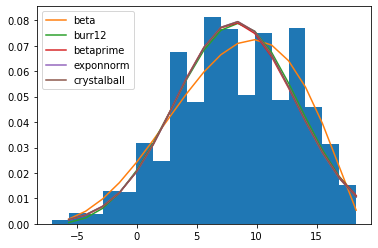

In [98]:
# Calcular d y p utilizando la función best_dist
d, p = best_dist(data_train['temp_min'])
print("Distribución seleccionada:", d)
print("Parámetros de la distribución:", p)

## Reduccion de varianza

Distribución seleccionada: <scipy.stats._continuous_distns.burr12_gen object at 0x000001CCE1A661F0>
Parámetros de la distribución: (5.002925306469001, 5.906842181919647, -12.19735148168552, 31.062467386715582)


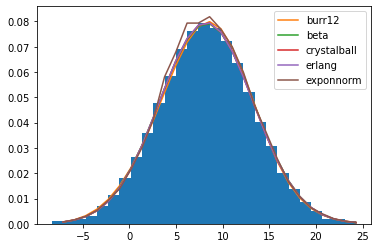

In [99]:
# Realizar muestreo estratificado
Ui_estratificado = m_estratificado(0, 1, B)
datos_estratificados_tempmin = st.norm(loc=np.mean(data_train['temp_min']), scale=np.std(data_train['temp_min'])).ppf(Ui_estratificado)

# Calcular d y p utilizando la función best_dist con los datos estratificados
d, p = best_dist(datos_estratificados_tempmin)
print("Distribución seleccionada:", d)
print("Parámetros de la distribución:", p)

## Prueba Q-Q

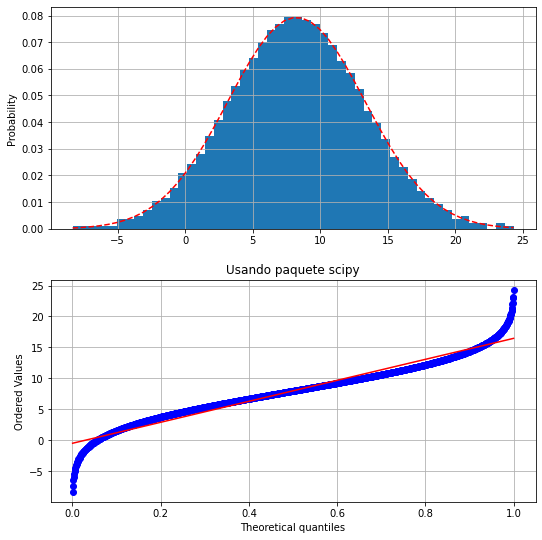

In [100]:
mejordist = "beta"
Q_Q(datos_estratificados_tempmin, mejordist, p)

In [101]:
parametros = st.beta.fit(datos_estratificados_tempmin)
# Realizar prueba de Kolmogorov-Smirnov
D, p_value = kstest(datos_estratificados_tempmin, 'beta', args=parametros)

# Imprimir resultados
print("Prueba de Chi^2 con una distribucion","beta","y parametros",parametros)
print("Estadístico D: ", D)
print("p-value: ", p_value)

Prueba de Chi^2 con una distribucion beta y parametros (91.37618711574369, 88.84612330978732, -60.17802532165398, 134.92434114332616)
Estadístico D:  0.001442677784784685
p-value:  1.0


## P. Hipotesis
> $H_0$: la distribución no es `beta`

> $H_a$: los datos se distribuyen como `beta`

## Montecarlo

In [102]:
random.seed(42)
# Número de simulaciones
n_simulaciones = 10000

# Realizar la simulación de Monte Carlo
valor_esperado = monte_carlo_beta(parametros, n_simulaciones)

# Imprimir el valor esperado obtenido de la simulación de Monte Carlo
print("Valor esperado de la simulación de Monte Carlo:", valor_esperado)

Valor esperado de la simulación de Monte Carlo: 8.349649439831325


In [103]:
mediadatos = np.mean(data_train['temp_min'])
mediadatos

8.23188736681887

In [104]:
# Calcular el error
error = abs(valor_esperado - mediadatos) / mediadatos * 100
print("Error%:", error)


Error%: 1.430559818968487


## Nodo 4 Velocidad del Viento (wind)

Distribución seleccionada: <scipy.stats._continuous_distns.burr_gen object at 0x000001CCE1A4F460>
Parámetros de la distribución: (4.373540196428268, 0.7283589923261939, -0.005542235466236167, 3.3565199272078075)


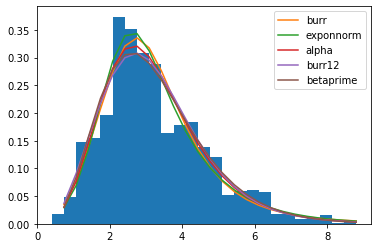

In [105]:
# Calcular d y p utilizando la función best_dist
d, p = best_dist(data_train['wind'])
print("Distribución seleccionada:", d)
print("Parámetros de la distribución:", p)

## Reduccion de Varianza

Distribución seleccionada: <scipy.stats._continuous_distns.crystalball_gen object at 0x000001CCE1B25040>
Parámetros de la distribución: (13.81707222751715, 1960.9900522986097, 3.293957449247044, 1.3718612853805872)


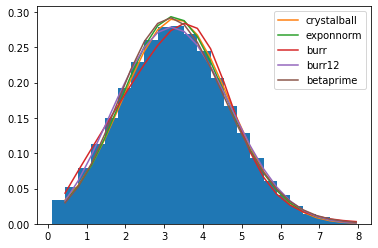

In [106]:
# Realizar muestreo estratificado
Ui_estratificado = m_estratificado(0, 1, B)
datos_estratificados_wind = st.norm(loc=np.mean(data_train['wind']), scale=np.std(data_train['wind'])).ppf(Ui_estratificado)
# Filtrar valores menores que cero ya que no puede haber menor a 0
datos_estratificados_wind_filtrados = datos_estratificados_wind[datos_estratificados_wind >= 0.1]


# Calcular d y p utilizando la función best_dist con los datos estratificados
d, p = best_dist(datos_estratificados_wind_filtrados)
print("Distribución seleccionada:", d)
print("Parámetros de la distribución:", p)

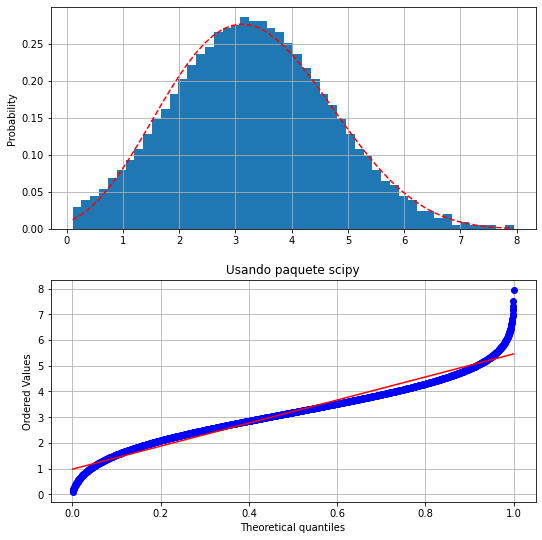

In [107]:
mejordist = "beta"
Q_Q(datos_estratificados_wind_filtrados, mejordist, p)

In [108]:
parametros = st.beta.fit(datos_estratificados_wind_filtrados)
# Realizar prueba de Kolmogorov-Smirnov
D, p_value = kstest(datos_estratificados_wind_filtrados, 'beta', args=parametros)

# Imprimir resultados
print("Prueba de Chi^2 con una distribucion","beta","y parametros",parametros)
print("Estadístico D: ", D)
print("p-value: ", p_value)

Prueba de Chi^2 con una distribucion beta y parametros (5.415937858211761, 7.924022234080299, -1.0104329039793256, 10.59995952823871)
Estadístico D:  0.009670543676908838
p-value:  0.9996510213089204


## P. Hipotesis
> $H_0$: la distribución no es `beta`

> $H_a$: los datos se distribuyen como `beta`

In [109]:
random.seed(42)
# Número de simulaciones
n_simulaciones = 10000

# Realizar la simulación de Monte Carlo
valor_esperado = monte_carlo_beta(parametros, n_simulaciones)

# Imprimir el valor esperado obtenido de la simulación de Monte Carlo
print("Valor esperado de la simulación de Monte Carlo:", valor_esperado)

Valor esperado de la simulación de Monte Carlo: 3.280302361097283


In [110]:
mediadatos = np.mean(data_train['wind'])
mediadatos

3.243455098934547

In [111]:
# Calcular el error
error = abs(valor_esperado - mediadatos) / mediadatos * 100
print("Error%:", error)

Error%: 1.1360497074505485


# Conclusion:
Este nodo se puede simular con un nivel de significancia alto. 

## Técnicas de generación de PDF

In [112]:
# Función de aceptación y rechazo modificada
def Acep_rechazo_array(R2, R1, f, t):
    f_x = f(R1)
    t_x = t(R1)
    accepted_values = R1[R2 * t_x <= f_x]
    return accepted_values

# Definir la función de densidad de probabilidad (PDF) y la función constante t(x)
def f(x):
    return kde(x)

def t(x):
    return max_f * np.ones(len(x))

# Rango donde se graficarán las funciones
x = np.arange(np.min(selected_columns.values), np.max(selected_columns.values), 0.01)

# Obtener el máximo de la función f para todas las columnas
max_f = np.max([gaussian_kde(data_train[column]).evaluate(x) for column in selected_columns.columns])

# Validación del método para cada columna seleccionada
accepted_values_dict = {}
for column in selected_columns.columns:
    # Obtener los datos de la columna
    datos_columna = selected_columns[column]
    
    # Función de densidad de probabilidad (PDF) para la columna
    kde = gaussian_kde(datos_columna)
    
    # Ejecutar el método de aceptación y rechazo
    N = 1000 
    R2 = np.random.uniform(0, 1, N)
    R1 = np.random.uniform(np.min(datos_columna), np.max(datos_columna), N)
    accepted_values = Acep_rechazo_array(R2, R1, f, t)
    accepted_values_dict[column] = accepted_values
# Obtener la longitud máxima de las listas de valores aceptados
max_length = max(len(accepted_values) for accepted_values in accepted_values_dict.values())

# Llenar las listas de valores aceptados con NaN para que todas tengan la misma longitud
for column, accepted_values in accepted_values_dict.items():
    accepted_values_dict[column] = np.concatenate([accepted_values, [np.nan] * (max_length - len(accepted_values))])

# Crear DataFrame con los valores aceptados por columna
accepted_values_df = pd.DataFrame(accepted_values_dict)

# Ver el DataFrame resultante
print(accepted_values_df)

# Crear DataFrame con los valores aceptados por columna
accepted_values_df = pd.DataFrame(accepted_values_dict)

# Ver el DataFrame resultante
print(accepted_values_df)


     precipitation   temp_max   temp_min      wind
0         0.523346  18.883476  13.919855  4.372568
1         8.219458  10.606701  17.765551  2.733624
2         3.037605  26.004444   6.359329  6.535653
3         0.730484  16.629561   2.280252  3.217090
4         0.271161  11.726468   0.685032  4.066807
..             ...        ...        ...       ...
317            NaN        NaN        NaN  3.292434
318            NaN        NaN        NaN  1.608859
319            NaN        NaN        NaN  2.642813
320            NaN        NaN        NaN  4.264469
321            NaN        NaN        NaN  0.624694

[322 rows x 4 columns]
     precipitation   temp_max   temp_min      wind
0         0.523346  18.883476  13.919855  4.372568
1         8.219458  10.606701  17.765551  2.733624
2         3.037605  26.004444   6.359329  6.535653
3         0.730484  16.629561   2.280252  3.217090
4         0.271161  11.726468   0.685032  4.066807
..             ...        ...        ...       ...
317    

In [113]:
# Eliminar las filas que contienen NaN
accepted_values_df_cleaned = accepted_values_df.dropna()

# Seleccionar las filas que tienen exactamente 4 valores no nulos
accepted_values_df_filtered = accepted_values_df_cleaned[accepted_values_df_cleaned.count(axis=1) == 4]

# Mostrar el DataFrame resultante
print(accepted_values_df_filtered)


    precipitation   temp_max   temp_min      wind
0        0.523346  18.883476  13.919855  4.372568
1        8.219458  10.606701  17.765551  2.733624
2        3.037605  26.004444   6.359329  6.535653
3        0.730484  16.629561   2.280252  3.217090
4        0.271161  11.726468   0.685032  4.066807
5        0.278680  13.000737  10.520690  3.798215
6        2.730107   4.267567  15.103579  2.523431
7       13.742720  10.524516   7.425788  2.359047
8        0.373030  11.470328   5.658513  1.825408
9       18.375426  20.950735   6.217648  2.925293
10      10.860165  14.807472  11.083491  3.163321
11       0.920732  24.481182   9.577676  2.397623
12       0.277532  12.075474   2.890882  3.257940
13       0.275231  12.917472  10.029525  2.510359
14       0.962642  11.474424   3.218879  4.899507
15       3.609717  16.395670   6.433108  4.549786
16       2.887378  16.232562   2.750741  3.271502
17       0.213398  11.091089  13.272089  1.173747
18       5.432617   9.122697   7.718281  4.624880


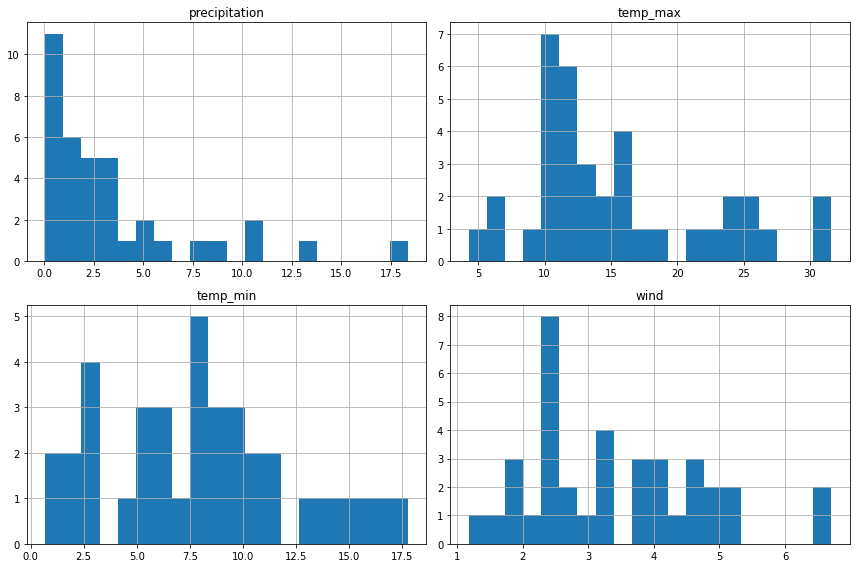

In [125]:
# Generar histograma de cada columna
accepted_values_df_filtered.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()


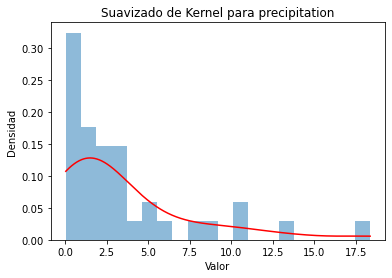

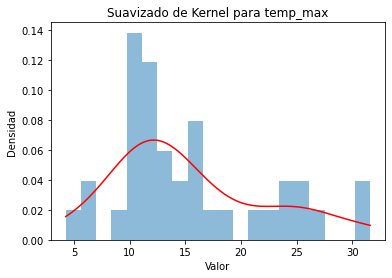

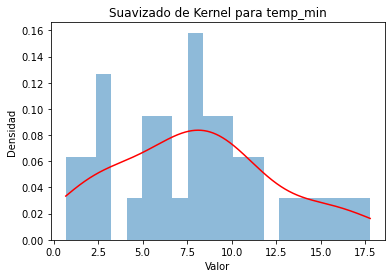

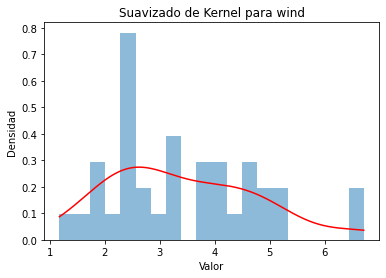

In [129]:
# Aplicar suavizado de kernel a cada columna del DataFrame accepted_values_df_filtered
for column in accepted_values_df_filtered.columns:
    # Histograma
    plt.hist(accepted_values_df_filtered[column], bins=20, density=True, alpha=0.5)
    
    # Suavizado de kernel
    kde = gaussian_kde(accepted_values_df_filtered[column])
    x_vals = np.linspace(min(accepted_values_df_filtered[column]), max(accepted_values_df_filtered[column]), 1000)
    plt.plot(x_vals, kde(x_vals), 'r')
    plt.xlabel('Valor')
    plt.ylabel('Densidad')
    plt.title(f'Suavizado de Kernel para {column}')
    plt.show()

In [147]:
# Definir los resultados simulados como un array numpy
resultados_simulados = accepted_values_df_filtered.to_numpy()

# Calcular la distancia entre cada fila de resultados simulados y cada fila de data_train
distancias = np.sqrt(np.sum((data_train.iloc[:, 1:5].values[:, np.newaxis] - resultados_simulados) ** 2, axis=2))
indice_min_distancia = np.argmin(distancias, axis=0)
# Obtener el clima asociado a la fila con la menor distancia para cada fila de resultados simulados
clima_predicho = data_train.iloc[indice_min_distancia]['weather'].values
print(clima_predicho)


['rain' 'rain' 'sun' 'sun' 'sun' 'rain' 'rain' 'rain' 'sun' 'rain' 'rain'
 'sun' 'sun' 'fog' 'rain' 'rain' 'sun' 'rain' 'rain' 'rain' 'rain'
 'drizzle' 'rain' 'rain' 'rain' 'rain' 'rain' 'rain' 'rain' 'sun' 'rain'
 'sun' 'rain' 'rain' 'rain' 'sun' 'sun']


In [148]:
#Si la temp min es <2 la probabilidad de nieve es mayor
temp_min = accepted_values_df_filtered['temp_min']
clima_predicho[temp_min < 2] = 'snow'

# Imprimir los resultados predichos
print(clima_predicho)


['rain' 'rain' 'sun' 'sun' 'snow' 'rain' 'rain' 'rain' 'sun' 'rain' 'rain'
 'sun' 'sun' 'fog' 'rain' 'rain' 'sun' 'rain' 'rain' 'rain' 'rain'
 'drizzle' 'rain' 'rain' 'snow' 'rain' 'rain' 'rain' 'rain' 'sun' 'rain'
 'sun' 'rain' 'rain' 'rain' 'snow' 'sun']


## Obtencion de distintos escenarios para el Juego

### 1.8 Conclusiones.
> Con la ayuda de la base de datos de kaggle se pudo modelar correctamente con cierta distribucion correctamente para 3 nodos que son temp_min, temp_max y velocidad del viento. Con la prueba de Kolmogorov-Smirnov y Chi cuadrada con valores de p-value mayores a .99. Y uno de nuestros nodos no se pudo modelar correctamente ya que en la base de datos habia muchos datos con valor de 0 lo cual hizo mas dificil generar una PDF correcta. 

> Se obtuvo una simulacion de 34 escenarios posibles para nuestro videjuego que siguen de 3 a 4 variables correctamente y se puede decir con seguridad que se van a generar resultados muy similares al clima de Seattle. 

> Se pudo simular correctamente 3 de 4 nodos que siguen una distribucion beta, asi podemos generar las variables aleatorias que siguen la distribucion deseada para nuestro juego.

# Problemas Encontrados
> La base de datos carece de variables importantes para poder predecir correctamente el clima tales como: humedad, estacionalidad, presion atmosferica, insolacion, entre otros.

> Al tener pocos nodos y no poder simular de manera deseada uno de ellos la precision de nuestro modelo baja significativamente. 


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>